In [34]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('fashion-mnist.csv')

In [36]:
#Convert the dataset to numpy array
x=np.array(df)

In [37]:
#Separating Labels and features
ytrain=x[:,0]
xtrain=x[:,1:]

In [38]:
#Converting all the pixels value between 0 to 1zz
xtrain=xtrain/255.0

In [39]:
#Since CNN takes images so give it in the from of a grayscale image(only 1 channel)
xtrain=xtrain.reshape((-1,28,28,1))

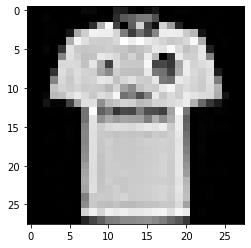

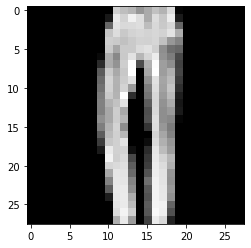

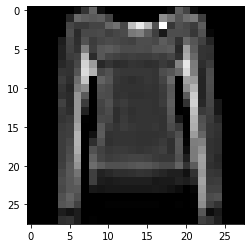

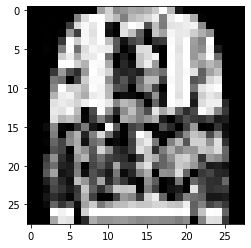

In [59]:
#print(xtrain.shape)
#visualising images
for i in range(4):
    plt.imshow(xtrain[i],cmap='gray')
    plt.show()

In [41]:
#Since we need to give it to CNN so convert the labels to one hot notation
ytrain=np_utils.to_categorical(ytrain)

In [42]:
ytrain.shape
#we see that the number of total labels is 10

(10000, 10)

In [44]:
#CNN MODEL
#initialise the model
model=Sequential()
#add a convolutional layer with 32 filters and filter size as (3,3)
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#another convolutional layer( no need of input_size as it takes input from previous layer)
model.add(Convolution2D(64,(3,3),activation='relu'))
#Add a dropout to reduce overfitting(here 25% neurons will be dropped out)
model.add(Dropout(0.25))
#Add a pooling Layer with filter size(2,2)
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
#Flatten the data and feed to Dense Layer(10 neurons because number of classes is 10)
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [45]:
#Info About Model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [48]:
#Compile the model
#since it is multi class classification so we use categorical cross entropy
#adam is one of the best optimizers
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
#train the model
#20% of data will be used for validation
hist=model.fit(xtrain,ytrain,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
32/32 [==============================] - 12s 360ms/step - loss: 2.0830 - accuracy: 0.2658 - val_loss: 1.3036 - val_accuracy: 0.5585
Epoch 2/20
32/32 [==============================] - 11s 355ms/step - loss: 1.0268 - accuracy: 0.6239 - val_loss: 0.7852 - val_accuracy: 0.7255
Epoch 3/20
32/32 [==============================] - 13s 408ms/step - loss: 0.7291 - accuracy: 0.7344 - val_loss: 0.6675 - val_accuracy: 0.7495
Epoch 4/20
32/32 [==============================] - 13s 404ms/step - loss: 0.6240 - accuracy: 0.7677 - val_loss: 0.5998 - val_accuracy: 0.7880
Epoch 5/20
32/32 [==============================] - 13s 406ms/step - loss: 0.5492 - accuracy: 0.7944 - val_loss: 0.5659 - val_accuracy: 0.7990
Epoch 6/20
32/32 [==============================] - 13s 413ms/step - loss: 0.4959 - accuracy: 0.8153 - val_loss: 0.5304 - val_accuracy: 0.8090
Epoch 7/20
32/32 [==============================] - 13s 403ms/step - loss: 0.4905 - accuracy: 0.8204 - val_loss: 0.5062 - val_accuracy: 0.8245

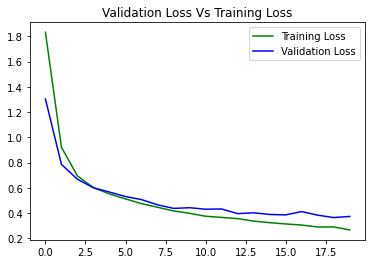

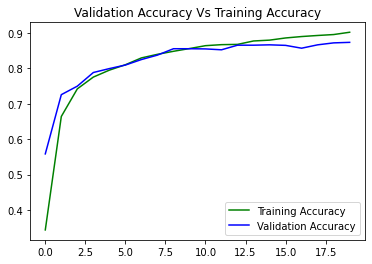

In [51]:
##Plot the validation loss vs training loss
plt.figure(0)
plt.title("Validation Loss Vs Training Loss")
plt.plot(hist.history['loss'],'g',label='Training Loss')
plt.plot(hist.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.show()

#plot the validation accuracy vs training accuracy
plt.title("Validation Accuracy Vs Training Accuracy")
plt.plot(hist.history['accuracy'],'g',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],'b',label='Validation Accuracy')
plt.legend()
plt.show()

In [55]:
#.Since our validation accuracy and Training Accuracy are very close! Thus the model is not overfitting and is correctly trained :)